<a href="https://colab.research.google.com/github/apoorvamishra2107/Codsoft/blob/main/Project_2_0_Movie_rating_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import necessary libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# read the dataset into a dataframe
df = pd.read_csv("IMDb Movies India.csv.zip", encoding='latin1')
# show first five records of dataframe
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
# show the number of records and observations in the dataframe
df.shape

(15509, 10)

In [ ]:
# check out the information on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
# check out the missing values in each observation
df.isna().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
# drop records with missing value in any of the following columns: Name, Year, Duration, Votes, Rating
df.dropna(subset=['Name', 'Year', 'Duration', 'Votes', 'Rating'], inplace=True)

# check the missing values in each observation again
df.isna().sum()

,0
Name,0
Year,0
Duration,0
Genre,31
Rating,0
Votes,0
Director,1
Actor 1,75
Actor 2,117
Actor 3,163


In [ ]:
# remove rows with duplicate movie records
df.drop_duplicates(subset=['Name', 'Year', 'Director'], keep='first', inplace=True)

In [ ]:
# remove () from the Year column values and change the datatype to integer
df['Year'] = df['Year'].str.strip('()').astype(int)

In [ ]:
# remove minutes from the Duration column values
df['Duration'] = df['Duration'].str.replace(r' min', '').astype(int)

In [ ]:
# remove commas from Votes column and convert to integer
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)

# show the number of records and observations after cleaning the dataframe
df.shape

(5850, 10)

In [ ]:
# show the info on the cleaned dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5850 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5850 non-null   object 
 1   Year      5850 non-null   int64  
 2   Duration  5850 non-null   int64  
 3   Genre     5819 non-null   object 
 4   Rating    5850 non-null   float64
 5   Votes     5850 non-null   int64  
 6   Director  5849 non-null   object 
 7   Actor 1   5775 non-null   object 
 8   Actor 2   5733 non-null   object 
 9   Actor 3   5687 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 502.7+ KB


In [ ]:
# show the statistics of the dataframe
df.describe()

,Year,Duration,Rating,Votes
count,5850.000000,5850.000000,5850.000000,5850.000000
mean,1996.426496,132.293675,5.931504,2611.717949
std,19.902673,26.558025,1.389772,13434.933770
min,1931.000000,21.000000,1.100000,5.000000
25%,1983.000000,117.000000,5.000000,28.000000
50%,2002.000000,134.000000,6.100000,119.000000
75%,2013.000000,150.000000,7.000000,862.750000
max,2021.000000,321.000000,10.000000,591417.000000


Exploratory Data Analysis

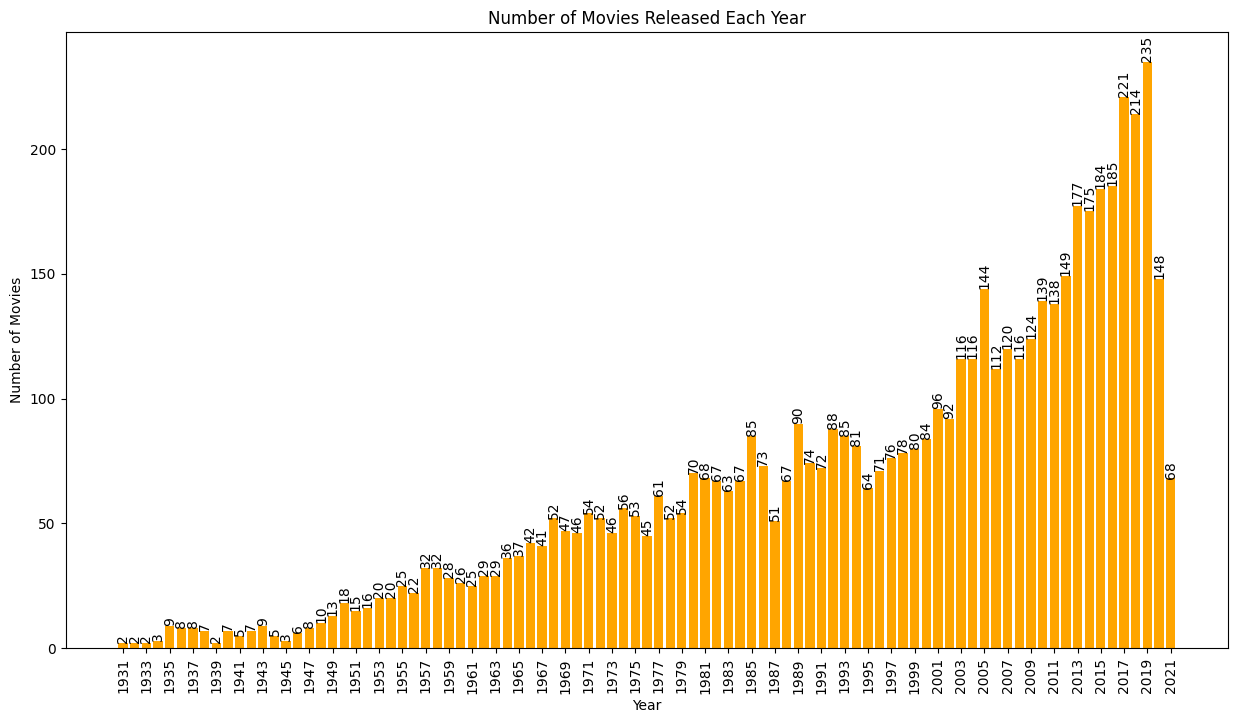

In [ ]:
# group the data by Year and count the number of movies in each year
yearly_movie_counts = df['Year'].value_counts().sort_index()

# create a bar chart and assign the return value to `bars`
plt.figure(figsize=(15, 8))
bars = plt.bar(yearly_movie_counts.index, yearly_movie_counts.values, color='orange') # Assign the result of plt.bar to bars
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Each Year')

# Show every second year on the x-axis and rotate x-labels for better readability
plt.xticks(yearly_movie_counts.index[::2], rotation=90)

# Now, the 'bars' variable is defined and can be iterated over
for bar in bars:
    xval = bar.get_x() + bar.get_width() / 2
    yval = bar.get_height()
    plt.text(xval, yval, int(yval), ha='center', va='bottom', rotation=90)

plt.show()

In [ ]:
# create dummy columns for each genre
dummies = df['Genre'].str.get_dummies(', ')
# creating a new dataframe which combines df and dummies
df_genre = pd.concat([df, dummies], axis=1)

In [ ]:
genre_columns = df_genre.columns[10:]  # Assuming genre columns start from the 11th column
genre_columns

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western'],
      dtype='object')

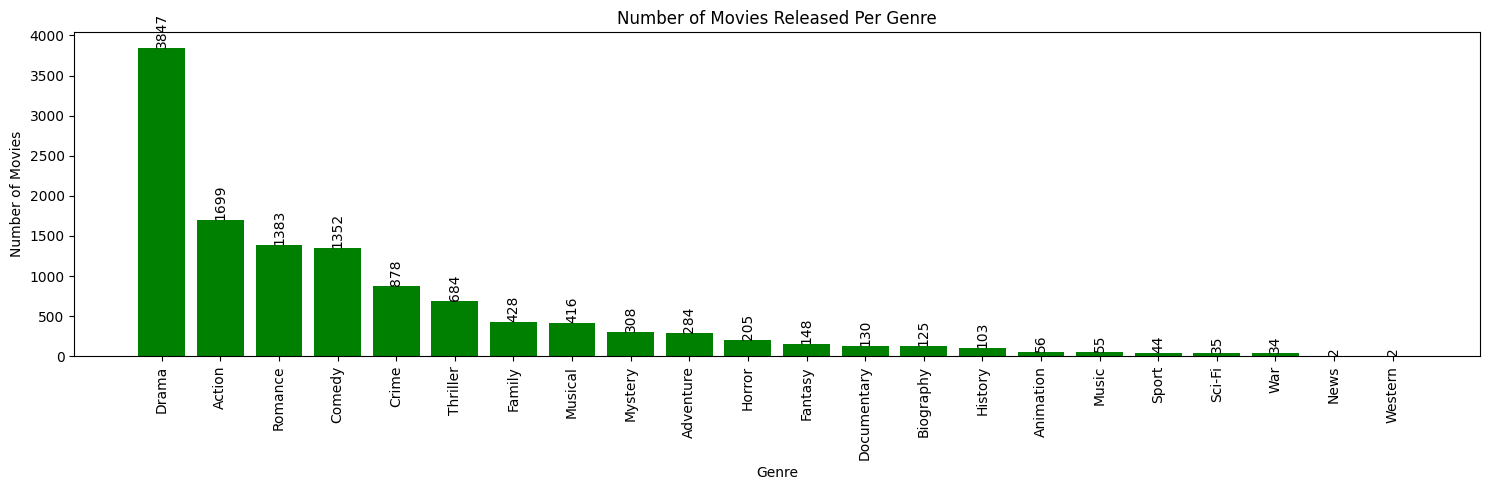

In [ ]:
# group the data by genre_columns and count the number of movies in each genre
genre_movie_counts = df_genre[genre_columns].sum().sort_values(ascending=False) # Sort by count to display major genres first

# create a bar chart
plt.figure(figsize=(15, 5))
plt.bar(genre_movie_counts.index, genre_movie_counts.values, color='green')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Per Genre')

plt.xticks(rotation=90)

# Iterate over the newly created bars, not the previous 'bars' variable
for i, val in enumerate(genre_movie_counts.values):
    plt.text(i, val, int(val), ha='center', va='bottom', rotation=90)

plt.tight_layout() # Adjust layout to prevent overlapping elements
plt.show()

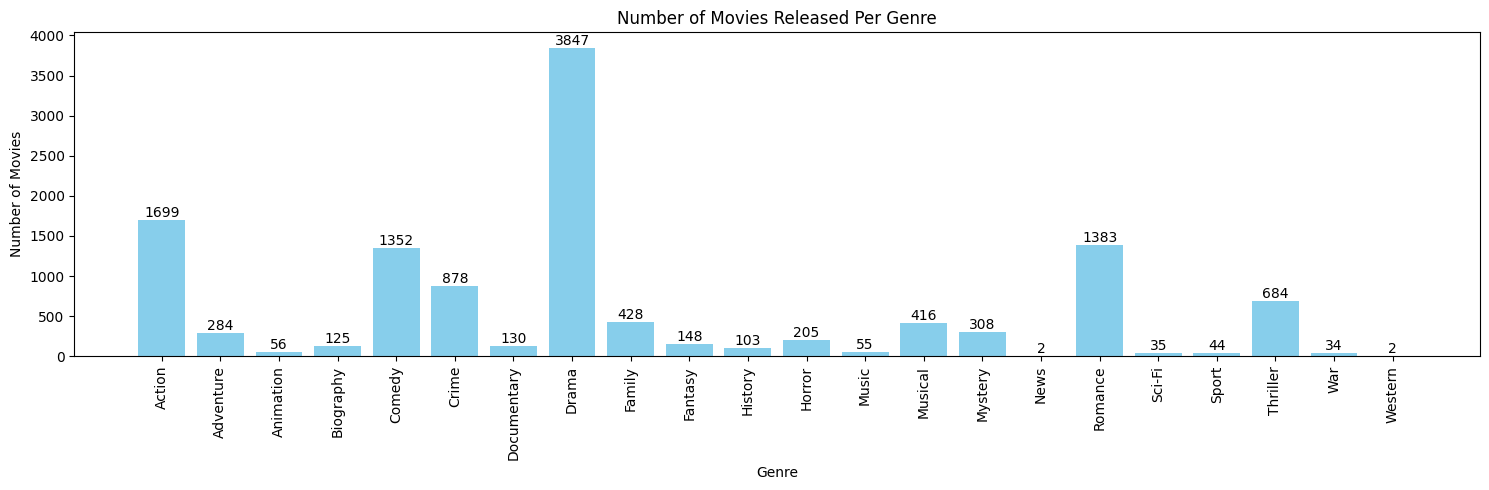

In [ ]:
# group the data by genre_columns and count the number of movies in each genre
genre_movie_counts = df_genre[genre_columns].sum().sort_index()

# create a bar chart
plt.figure(figsize=(15, 5))  # Reduced figure size
plt.bar(genre_movie_counts.index, genre_movie_counts.values, color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Per Genre')

plt.xticks(rotation=90)

# Iterate over the bars in the CURRENT plot
for i, val in enumerate(genre_movie_counts.values):
    plt.text(i, val, int(val), ha='center', va='bottom') # Annotate using index

plt.tight_layout() # Adjust layout to prevent overlapping elements
plt.show()

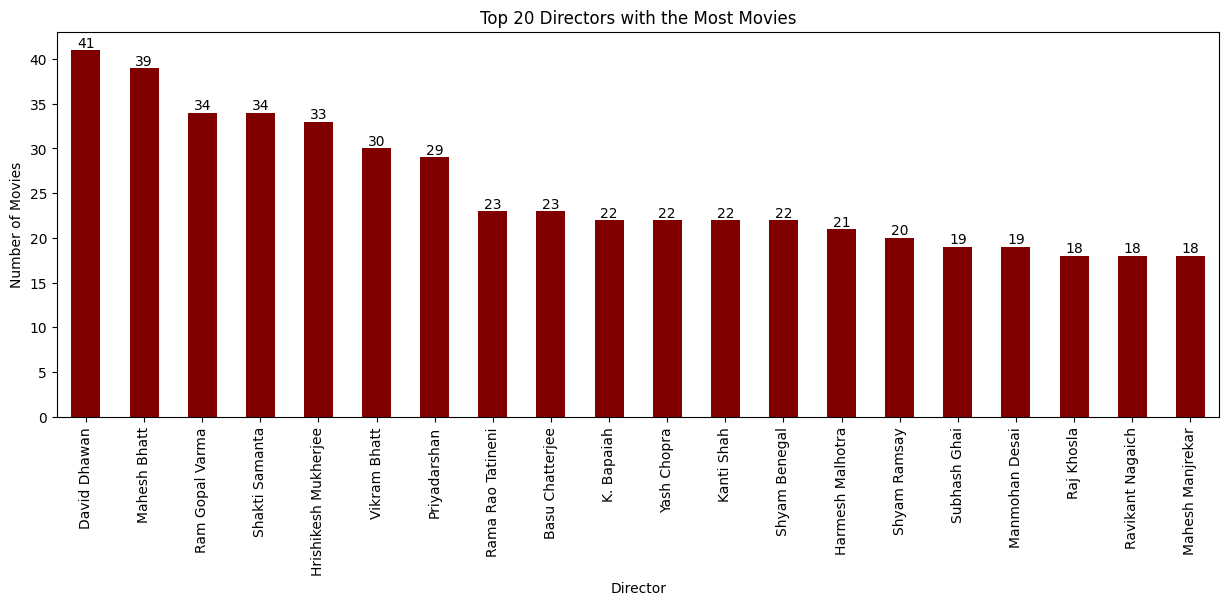

In [ ]:
# Analyzing count of movies of each director
director_movie_counts = df['Director'].value_counts()

# Create a bar chart
plt.figure(figsize=(15, 5))
bars = director_movie_counts.head(20).plot(kind='bar', color='maroon')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.title('Top 20 Directors with the Most Movies')
plt.xticks(rotation=90)

# Add count labels on top of the bars
for bar in bars.patches:
    xval = bar.get_x() + bar.get_width() / 2
    yval = bar.get_height()
    plt.text(xval, yval, int(yval), ha='center', va='bottom')

plt.show()

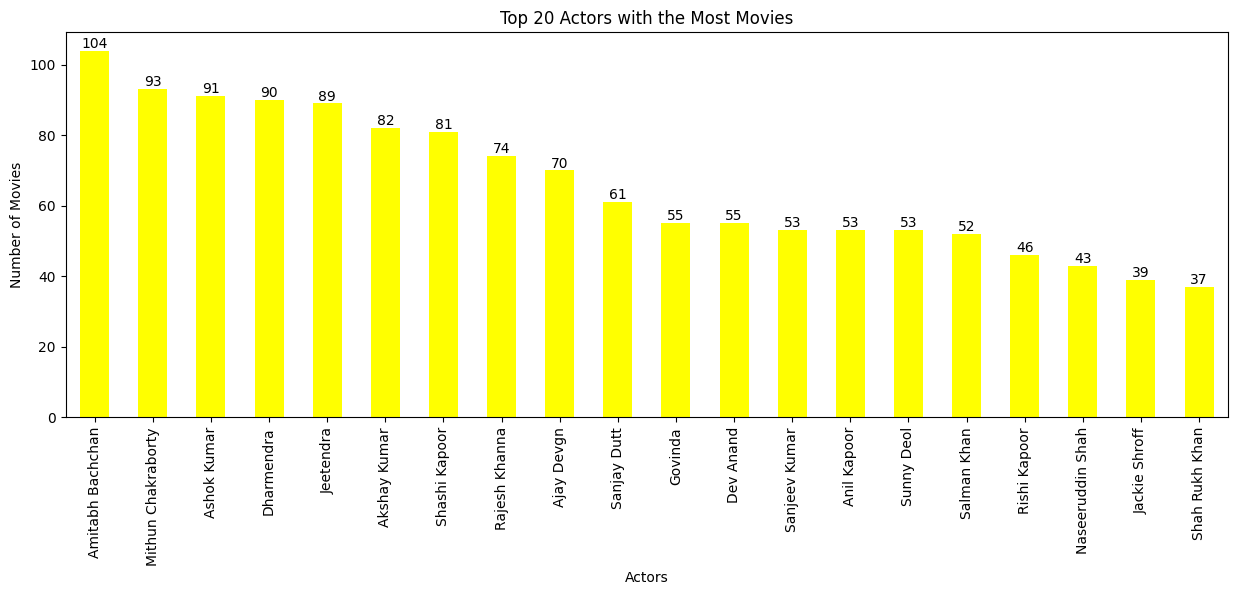

In [ ]:
# To Count Top 20 movies for each actor
actor_movie_counts = df['Actor 1'].value_counts()

# Create a bar chart
plt.figure(figsize=(15, 5))
actor_movie_counts.head(20).plot(kind='bar', color='yellow')
plt.xlabel('Actors')
plt.ylabel('Number of Movies')
plt.title('Top 20 Actors with the Most Movies')
plt.xticks(rotation=90)

# Add count labels on top of the bars
for i, v in enumerate(actor_movie_counts.head(20)):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

<ipython-input-37-5e253b76178e>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_counts = df.groupby(['Duration_Group', 'Rating'])['Rating'].count().reset_index(name='Count')


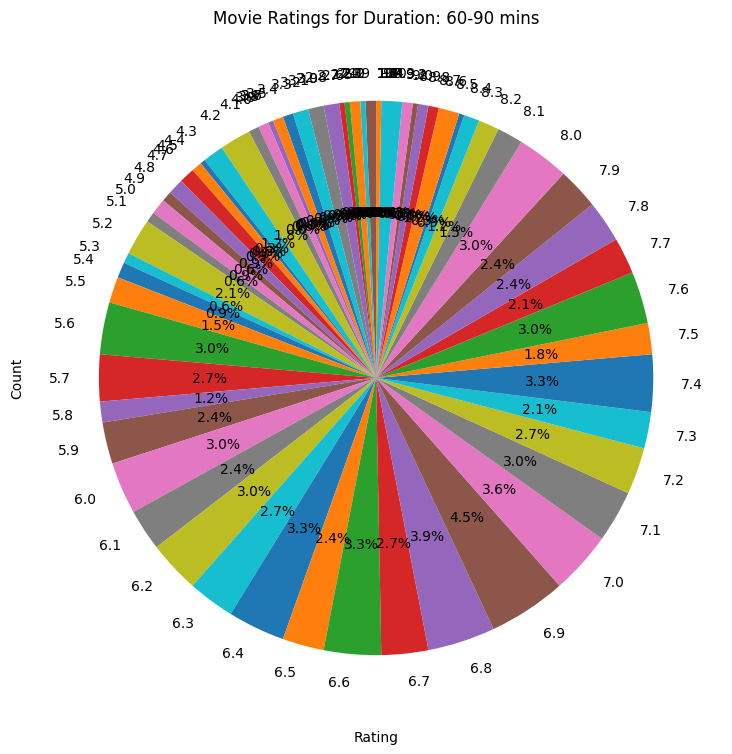

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'df' is your DataFrame

plt.figure(figsize=(15, 9))

# Calculate value counts for each rating within each duration group
# This will be used for creating the pie chart
# Note: Adjust 'bins' and 'labels' according to your specific needs
df['Duration_Group'] = pd.cut(df['Duration'], bins=[0, 60, 90, 120, float('inf')],
                                  labels=['<60', '60-90', '90-120', '>120'])
rating_counts = df.groupby(['Duration_Group', 'Rating'])['Rating'].count().reset_index(name='Count')

# Create a pie chart for a specific duration group (e.g., 60-90)
duration_group = '60-90'
data = rating_counts[rating_counts['Duration_Group'] == duration_group]

# Use matplotlib.pyplot.pie to create the pie chart
plt.pie(data['Count'], labels=data['Rating'], autopct='%1.1f%%', startangle=90)

# Set title and labels
plt.title(f'Movie Ratings for Duration: {duration_group} mins')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.show()

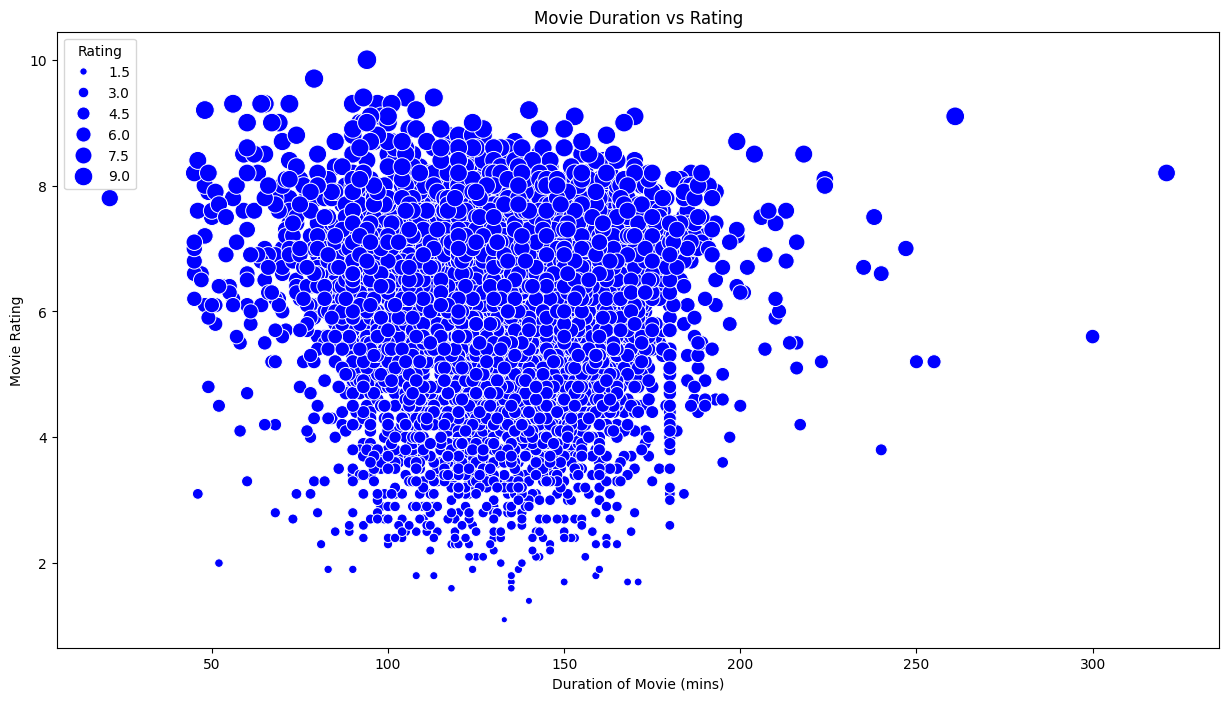

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(15, 8))

# Use sns.scatterplot to create a bubble chart effect
# 'size' parameter controls the size of the points
# 'sizes' parameter allows customization of the size range
sns.scatterplot(x=df['Duration'], y=df['Rating'], size=df['Rating'], sizes=(20, 200), color='blue')

plt.xlabel('Duration of Movie (mins)')
plt.ylabel('Movie Rating')
plt.title('Movie Duration vs Rating')
plt.show()

In [ ]:
# dropping the columns from the dataframe since these are the least dependable observations for target variable 'Rating'
df.drop(['Name','Director','Actor 1','Actor 2','Actor 3'], axis=1,inplace=True)
# show first five records of the dataframe
df.head()

,Year,Duration,Genre,Rating,Votes,Duration_Group
1,2019,109,Drama,7.0,8,90-120
3,2019,110,"Comedy, Romance",4.4,35,90-120
5,1997,147,"Comedy, Drama, Musical",4.7,827,>120
6,2005,142,"Drama, Romance, War",7.4,1086,>120
8,2012,82,"Horror, Mystery, Thriller",5.6,326,60-90


In [ ]:
# creating target variable and learning observations for the model
X = df[['Year','Duration','Votes']]
y = df['Rating']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=231)

In [ ]:
# creating a liner regression model
lr = LinearRegression()

# training the data on linear regression model
lr.fit(X_train, y_train)

# predicting the test data on trained model
pred = lr.predict(X_test)

# evaluating linear regression model
r2_score(y_test,pred)

0.008207910636606974

In [ ]:
# creating a range for number of neighbors parameter of the KNN model
kRange = range(1,40,1)

# creating an empty scores list
scores_list = []

# iterate every value in kRange list
for i in kRange:
    # create a K Nearest Neighbor model with i as number of neighbors
    regressor_knn = KNeighborsRegressor(n_neighbors = i)

    # fit training data to the KNN model
    regressor_knn.fit(X_train,y_train)
    # evaluate the model
    pred = regressor_knn.predict(X_test)

    # append the regression score for evaluation of the model to scores_list
    scores_list.append(r2_score(y_test,pred))

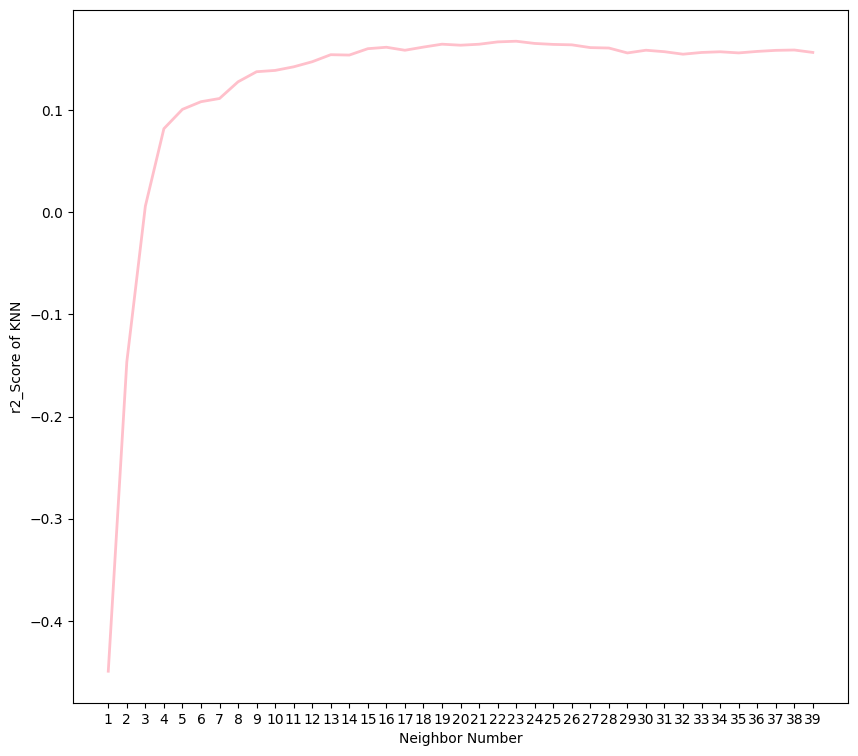

In [ ]:
plt.figure(figsize=(10,9))
# create a line graph for showing regression score (scores_list) for respective number of neighbors used in the KNN model
plt.plot(kRange, scores_list, linewidth=2, color='pink')
# values for x-axis should be the number of neighbors stored in kRange
plt.xticks(kRange)
plt.xlabel('Neighbor Number')
plt.ylabel('r2_Score of KNN')
plt.show()

In [ ]:
# Creating a KNN model with best parameters i.e., number of neighbors = 23
regressor_knn = KNeighborsRegressor(n_neighbors = 23)

# fit training data to the KNN model
regressor_knn.fit(X_train,y_train)
# evaluate test data on the model
pred = regressor_knn.predict(X_test)
# show regression score
r2_score(y_test,pred)

0.16726995125083455

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score

# Create an instance of the SGDRegressor
sgd_regressor = SGDRegressor(max_iter=100, random_state=1)  # You can adjust the max_iter and random_state

# Fit the model to your training data
sgd_regressor.fit(X_train, y_train)

# Make predictions
pred = sgd_regressor.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, pred)

print("R-squared score:", r2)

R-squared score: -2.313144312348176e+32


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=1)
rf_regressor.fit(X_train, y_train)
rf_pred = rf_regressor.predict(X_test)
r2_rf = r2_score(y_test, rf_pred)
print(f'R-squared score (Random Forest): {r2_rf}')

R-squared score (Random Forest): 0.15387392895286345


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=231)
gb_regressor.fit(X_train, y_train)
gb_pred = gb_regressor.predict(X_test)
r2_gb = r2_score(y_test, gb_pred)
print(f'R-squared score: {r2_gb}')

R-squared score: 0.2491687559641439
